In [1]:
pip install alpaca

  Preparing metadata (setup.py) ... done
  Created wheel for alpaca: filename=alpaca-1.0.0-py3-none-any.whl size=14064 sha256=12994efd0a32513c3ca576fea09fe95355a6dc890cb7aed66e6f6db5248b03a0
  Stored in directory: /root/.cache/pip/wheels/4a/26/e0/b1ae89a6dc93defaa52a502f261a1680d96d9a7a9539baca48
Successfully built alpaca


In [2]:
pip install load_dotenv

In [3]:
# Install the alpaca_trade_api module
!pip install alpaca-trade-api

# Import the module after installation
import alpaca_trade_api as tradeapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.7
    Uninstalling msgpack-1.0.7:
      Successfully uninstalled msgpack-1.0.7
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [4]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 16.8 MB/s eta 0:00:00


In [5]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=b049b4cd0c87c401179f0c452c88ae3f78751d6a023cefa7391b27a41d88b44a
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [6]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CrosshairTool
from bokeh.layouts import column
%matplotlib inline
import ta
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [7]:
# Load .env enviroment variables
load_dotenv()

False

In [8]:
# Set Alpaca API key and secret
ALPACA_API_KEY="PK7KB4YV1VVIZXY3KR7K"
ALPACA_SECRET_KEY="zdgytHlXTB3eR8hRW6pJk3LIZ1ER6EnzJDyLlqzg"

# Create the Alpaca API object
alpaca=tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version='v2'
)

In [9]:
# Format current date as ISO format
start_time=pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-12-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["MSFT"]
# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Day"


In [10]:
### Creating Alpaca Dataframe
df_tickers=alpaca.get_bars(
        tickers,
        timeframe,
        start=start_time,
        end=end_time
    ).df
df_tickers

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,62.58,62.84,62.125,115077,62.80,23692973,62.471587,MSFT
2017-01-04 05:00:00+00:00,62.30,62.75,62.120,112255,62.46,24383698,62.309944,MSFT
2017-01-05 05:00:00+00:00,62.30,62.66,62.030,117581,62.18,27927285,62.345968,MSFT
2017-01-06 05:00:00+00:00,62.84,63.15,62.040,111899,62.35,22359924,62.787132,MSFT
2017-01-09 05:00:00+00:00,62.64,63.08,62.540,98825,62.67,24621963,62.726351,MSFT
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,378.61,380.64,376.200,352851,376.78,22182355,378.579232,MSFT
2023-11-28 05:00:00+00:00,382.70,383.00,378.160,359084,378.35,20457971,381.538263,MSFT
2023-11-29 05:00:00+00:00,378.85,384.30,377.440,405673,383.76,28967214,379.513925,MSFT


In [86]:
# Fund and Shares & investement
fund=62.58
shares=float(fund)/df_tickers['close'].iloc[0]
df_tickers["invest"]=df_tickers["close"] * shares
print(f"Your Microsoft Shares are {round(shares,0)}")

Your Microsoft Shares are 1.0


In [12]:
### Defining function to calculate MACD and Signal Line
def calculate_macd(df_tickers = df_tickers, short_window=12, long_window=26):
        df_tickers['ShortEMA'] = df_tickers['close'].ewm(span=short_window, adjust=False).mean()
        df_tickers['LongEMA'] = df_tickers['close'].ewm(span=long_window, adjust=False).mean()
        df_tickers['MACD'] = df_tickers['ShortEMA'] - df_tickers['LongEMA']
        df_tickers['SignalLine'] = df_tickers['MACD'].ewm(span=9, adjust=False).mean()
        df_tickers['histogram'] = df_tickers['MACD'] - df_tickers['SignalLine']
        return df_tickers

In [13]:
### Calculating the MACD Line
calculate_macd(df_tickers)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,LongEMA,MACD,SignalLine,histogram
timestamp,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,62.58,62.84,62.125,115077,62.80,23692973,62.471587,MSFT,62.58,62.580000,62.580000,0.000000,0.000000,0.000000
2017-01-04 05:00:00+00:00,62.30,62.75,62.120,112255,62.46,24383698,62.309944,MSFT,62.30,62.536923,62.559259,-0.022336,-0.004467,-0.017869
2017-01-05 05:00:00+00:00,62.30,62.66,62.030,117581,62.18,27927285,62.345968,MSFT,62.30,62.500473,62.540055,-0.039581,-0.011490,-0.028091
2017-01-06 05:00:00+00:00,62.84,63.15,62.040,111899,62.35,22359924,62.787132,MSFT,62.84,62.552708,62.562273,-0.009565,-0.011105,0.001540
2017-01-09 05:00:00+00:00,62.64,63.08,62.540,98825,62.67,24621963,62.726351,MSFT,62.64,62.566138,62.568031,-0.001893,-0.009263,0.007370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,378.61,380.64,376.200,352851,376.78,22182355,378.579232,MSFT,378.61,370.977652,359.819063,11.158589,10.734050,0.424539
2023-11-28 05:00:00+00:00,382.70,383.00,378.160,359084,378.35,20457971,381.538263,MSFT,382.70,372.781090,361.513947,11.267143,10.840669,0.426474
2023-11-29 05:00:00+00:00,378.85,384.30,377.440,405673,383.76,28967214,379.513925,MSFT,378.85,373.714769,362.798099,10.916669,10.855869,0.060801


In [14]:
# Calculate the MACD and signal line using talib
#macd= ta.trend.MACD(data['Close']).macd()
#signal= ta.trend.MACD(data['Close']).macd_signal()

# Calculate the RSI using talib
rsi = ta.momentum.RSIIndicator(df_tickers['close']).rsi()

# Calculate the ADX using talib
adx = ta.trend.adx(df_tickers['high'], df_tickers['low'], df_tickers['close'])

#Moving averages short and long
df_tickers['ma 50']= df_tickers['close'].rolling(window=50).mean()
df_tickers['ma 200']=df_tickers['close'].rolling(window=200).mean()

# Volume related indicator
df_tickers['volume sma']=df_tickers['volume'].rolling(window=20).mean()

# Support and resistance levels
df_tickers['support level']=df_tickers['low'].rolling(window=50).min()
df_tickers['resistance level']=df_tickers['high'].rolling(window=50).max()

# Add RSI and ADX columns
df_tickers['rsi'] = rsi
df_tickers['adx'] = adx

# Set the short window and long window
short_window_sma = 4
long_window_sma = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
df_tickers['SMA_Fast'] = df_tickers['close'].rolling(window=short_window_sma).mean()
df_tickers['SMA_Slow'] = df_tickers['close'].rolling(window=long_window_sma).mean()

# Aweseome Oscillator
#awesome_oscillator = ta.momentum.AwesomeOscillator(high=df_tickers['high'], low=df_tickers['low'], window1=5, window2=34)
#df_tickers['Awesome_Oscillator'] = awesome_oscillator.awesome_oscillator()
df_tickers['Median_Price'] = (df_tickers['high'] + df_tickers['low']) / 2
df_tickers['SMA5'] = df_tickers['Median_Price'].rolling(window=5).mean()
df_tickers['SMA34'] = df_tickers['Median_Price'].rolling(window=34).mean()
df_tickers['Awesome_Oscillator'] = df_tickers['SMA5'] - df_tickers['SMA34']


# Chaikin Money Flow Indicator
#df_tickers['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], Close=df_tickers['close'], volume=df_tickers['volume'], window=20)
cmf_indicator = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], volume=df_tickers['volume'], window=20)
df_tickers['Chaikin_Money_Flow'] = cmf_indicator.chaikin_money_flow()

#ATR (Average True Range)
atr = ta.volatility.AverageTrueRange(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14)
df_tickers['ATR'] = atr.average_true_range()

# Bollinger Bands
bollinger_bands= ta.volatility.BollingerBands(close=df_tickers['close'], window=20, window_dev=2)
df_tickers['BB_Middle'] = bollinger_bands.bollinger_mavg()  # Middle band (SMA)
df_tickers['BB_Upper'] = bollinger_bands.bollinger_hband()  # Upper band
df_tickers['BB_Lower'] = bollinger_bands.bollinger_lband()  # Lower band

# Stochastic Oscillator
stochastic_oscillator = ta.momentum.StochasticOscillator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14, smooth_window=3)
df_tickers['%K'] = stochastic_oscillator.stoch()
df_tickers['%D'] = stochastic_oscillator.stoch_signal()

# CCI (Commodity Channel Index)
cci_indicator = ta.trend.CCIIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=20)
df_tickers['CCI'] = cci_indicator.cci()

# Parabolic SAR (Stop and Reverse)
psar_indicator = ta.trend.PSARIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'])
df_tickers['PSAR'] = psar_indicator.psar()

#Ichimoku Cloud
conversion_line_period = 9
base_line_period = 26
lagging_span_period = 52
conversion_line = (df_tickers['high'].rolling(window=conversion_line_period).max() + df_tickers['low'].rolling(window=conversion_line_period).min()) / 2
base_line = (df_tickers['high'].rolling(window=base_line_period).max() + df_tickers['low'].rolling(window=base_line_period).min()) / 2
leading_span_a = (conversion_line + base_line) / 2
leading_span_b = (df_tickers['high'].rolling(window=lagging_span_period).max() + df_tickers['low'].rolling(window=lagging_span_period).min()) / 2
lagging_span = df_tickers['close'].shift(-lagging_span_period)

df_tickers['Ichimoku_Conversion_Line'] = conversion_line
df_tickers['Ichimoku_Base_Line'] = base_line
df_tickers['Ichimoku_Leading_Span_A'] = leading_span_a
df_tickers['Ichimoku_Leading_Span_B'] = leading_span_b
df_tickers['Ichimoku_Lagging_Span'] = lagging_span

# Williams %R

williams_r_indicator = ta.momentum.WilliamsRIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], lbp=14)
df_tickers['Williams_%R'] = williams_r_indicator.williams_r()

# Volume Weighted Average Price (VWAP)
obv_indicator = ta.volume.OnBalanceVolumeIndicator(close=df_tickers['close'], volume=df_tickers['volume'])
df_tickers['On_Balance_Volume'] = obv_indicator.on_balance_volume()


# On-Balance Volume (OBV)
df_tickers['OBV'] = (df_tickers['close'].pct_change().fillna(0) > 0).astype(int)
df_tickers['OBV'] = (df_tickers['OBV'] * 2 - 1) * df_tickers['volume']
df_tickers['OBV'] = df_tickers['OBV'].cumsum()

# Relative Vigor Index (RVI)
df_tickers['Typical_Price'] = (df_tickers['high'] + df_tickers['low'] + 2 * df_tickers['close']) / 4
df_tickers['Closing_Price_Change'] = df_tickers['close'].diff()
df_tickers['RVI'] = df_tickers['Typical_Price'].rolling(window=14).sum() / df_tickers['Closing_Price_Change'].abs().rolling(window=14).sum()

#Aroon Indicator
aroon_indicator = ta.trend.AroonIndicator(high=df_tickers['high'], low=df_tickers['low'], window=14)
df_tickers['Aroon_Up'] = aroon_indicator.aroon_up()
df_tickers['Aroon_Down'] = aroon_indicator.aroon_down()
df_tickers['Aroon_Oscillator'] = aroon_indicator.aroon_indicator()

#Chaikin Oscillator
df_tickers['ADL'] = ((df_tickers['close'] - df_tickers['low']) - (df_tickers['high'] - df_tickers['close'])) / (df_tickers['high'] - df_tickers['low']) * df_tickers['volume']
df_tickers['ADL'] = df_tickers['ADL'].cumsum()
df_tickers['EMA3'] = df_tickers['ADL'].ewm(span=3, adjust=False).mean()
df_tickers['EMA10'] = df_tickers['ADL'].ewm(span=10, adjust=False).mean()
df_tickers['Chaikin_Oscillator'] = df_tickers['EMA3'] - df_tickers['EMA10']



In [15]:
df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,62.58,62.84,62.125,115077,62.80,23692973,62.471587,MSFT,62.58,62.580000,...,62.53125,NaN,NaN,NaN,NaN,NaN,6.461720e+06,6.461720e+06,6.461720e+06,0.000000e+00
2017-01-04 05:00:00+00:00,62.30,62.75,62.120,112255,62.46,24383698,62.309944,MSFT,62.30,62.536923,...,62.36750,-0.28,NaN,NaN,NaN,NaN,-3.988436e+06,1.236642e+06,4.561691e+06,-3.325050e+06
2017-01-05 05:00:00+00:00,62.30,62.66,62.030,117581,62.18,27927285,62.345968,MSFT,62.30,62.500473,...,62.32250,0.00,NaN,NaN,NaN,NaN,-7.978049e+06,-3.370703e+06,2.281739e+06,-5.652442e+06
2017-01-06 05:00:00+00:00,62.84,63.15,62.040,111899,62.35,22359924,62.787132,MSFT,62.84,62.552708,...,62.71750,0.54,NaN,NaN,NaN,NaN,1.892549e+06,-7.390774e+05,2.210977e+06,-2.950054e+06
2017-01-09 05:00:00+00:00,62.64,63.08,62.540,98825,62.67,24621963,62.726351,MSFT,62.64,62.566138,...,62.72500,-0.20,NaN,NaN,NaN,NaN,-1.361017e+07,-7.174623e+06,-6.655951e+05,-6.509028e+06


In [16]:
column_names = df_tickers.columns.tolist()
print(column_names)

['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol', 'invest', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'Chaikin_Money_Flow', 'ATR', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']


In [22]:
### Using a loop to Calculate buy and sell signals based on MACD verified by ADX
data_frame = df_tickers.copy()
position = None
buy_price = 0
invest_buy_price=0
total_buy_amount = 0
total_invest_buy_amount=0
total_sell_amount = 0
total_invest_sell_amount=0
sell_price = 0
invest_sell_price=0
signals = []
data_frame['algo signal']=pd.NA
for i in range(1, len(data_frame)):
        if (data_frame['MACD'][i] > data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] <= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'buy'
                  buy_price = data_frame['close'][i]
                  invest_buy_price=data_frame['invest'][i]
                  total_buy_amount += buy_price
                  total_invest_buy_amount += invest_buy_price
                  signals.append((data_frame.index[i], 'Buy', buy_price))
                  data_frame['algo signal'][i]=-1
        elif (data_frame['MACD'][i] < data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] >= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'sell'
                  sell_price = data_frame['close'][i]
                  invest_sell_price=data_frame['invest'][i]
                  total_sell_amount += sell_price
                  total_invest_sell_amount +=invest_sell_price
                  signals.append((data_frame.index[i], 'Sell', sell_price))
                  data_frame['algo signal'][i]=1

profit = total_sell_amount - total_buy_amount
invest_profit=total_invest_sell_amount - total_invest_buy_amount

<ipython-input-22-d23c19fc30cb>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=1
<ipython-input-22-d23c19fc30cb>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=-1


In [17]:
# ### Using a loop to Calculate buy and sell signals based on MACD Line verified by Bolinger Bands
# data_frame = df_tickers.copy()
# position = None
# buy_price = 0
# invest_buy_price=0
# total_buy_amount = 0
# total_invest_buy_amount=0
# total_sell_amount = 0
# total_invest_sell_amount=0
# sell_price = 0
# invest_sell_price=0
# signals = []
# data_frame['algo signal']=pd.NA
# for i in range(1, len(data_frame)):
#         if (data_frame['MACD'][i] > data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] <= data_frame['SignalLine'][i - 1]):
#                 for a in data_frame['BB_Lower']:
#                  if a > data_frame['close'][i]:
#                   position = 'buy'
#                   buy_price = data_frame['close'][i]
#                   invest_buy_price=data_frame['invest'][i]
#                   total_buy_amount += buy_price
#                   total_invest_buy_amount += invest_buy_price
#                   signals.append((data_frame.index[i], 'Buy', buy_price))
#                   data_frame['algo signal'][i]=-1
#         elif (data_frame['MACD'][i] < data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] >= data_frame['SignalLine'][i - 1]):
#                 for a in data_frame['BB_Upper']:
#                  if a < data_frame['close'][i]:
#                   position = 'sell'
#                   sell_price = data_frame['close'][i]
#                   invest_sell_price=data_frame['invest'][i]
#                   total_sell_amount += sell_price
#                   total_invest_sell_amount +=invest_sell_price
#                   signals.append((data_frame.index[i], 'Sell', sell_price))
#                   data_frame['algo signal'][i]=1

# profit = total_sell_amount - total_buy_amount
# invest_profit=total_invest_sell_amount - total_invest_buy_amount

<ipython-input-17-33db01e89e5a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=-1
<ipython-input-17-33db01e89e5a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=1


In [23]:
data_frame['trade price']=data_frame['close'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['invest trade price']=data_frame['invest'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['balance']=data_frame['trade price']*data_frame['algo signal']
data_frame['invest balance']=data_frame['invest trade price']*data_frame['algo signal']


In [24]:
column_titles_list = data_frame.columns.tolist()
print(column_titles_list)

['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol', 'invest', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'Chaikin_Money_Flow', 'ATR', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator', 'algo signal', 'trade price', 'invest trade price', 'balance', 'invest balance']


In [26]:
data_frame['buy']=data_frame['balance'].where(data_frame['balance']<0)
data_frame['sell']=data_frame['balance'].where(data_frame['balance']>0)
buy=data_frame['buy'].sum()
sell=data_frame['sell'].sum()
balance_profit=data_frame['balance'].sum()
print(f"total buy amount is ${buy}")
print(f"total sell amount is ${sell}")
print(f"Profit/Loss is ${balance_profit}")

total buy amount is $-14886.890000000003
total sell amount is $14998.22
Profit/Loss is $111.32999999999993


In [27]:
!pip install holoviews hvplot
import holoviews as hv

In [28]:
import hvplot.pandas

In [29]:
#MACD/Signal line
x_values = data_frame.index
macd_values = data_frame['MACD']
signal_values = data_frame['SignalLine']

# Create a Bokeh figure
macd_signal = figure(title="MACD and Signal Line", width=800, height=400, x_axis_label='Date', y_axis_label='Price', x_axis_type="datetime")

# Plot MACD and Signal Line
macd_signal.line(x_values, macd_values, line_color="blue", legend_label="MACD")
macd_signal.line(x_values, signal_values, line_color="darkorange", legend_label="Signal Line")

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("MACD", "@y{0.2f}")]
hover.formatters = {'@x': 'datetime'}
macd_signal.add_tools(hover)

# Add crosshair
macd_signal.add_tools(CrosshairTool(dimensions='both'))

# entry/exit line
x_values = data_frame.index
close_values = data_frame['close']
algo_signal_values = data_frame['algo signal']

# Create a Bokeh figure
entry_exit = figure(title="Entry and Exit Points", width=800, height=400, x_axis_label='Date', y_axis_label='Price')

# Plot close price
entry_exit.line(x_values, close_values, line_color="black", legend_label="Close Price")

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Close Price", "@y{0.2f}")]
hover.formatters = {'@x': 'datetime'}
entry_exit.add_tools(hover)

# Add crosshair
entry_exit.add_tools(CrosshairTool(dimensions='both'))

# Add entry and exit points
entry_points = data_frame[data_frame['algo signal'] == -1.0]
exit_points = data_frame[data_frame['algo signal'] == 1.0]

entry_exit.triangle(entry_points.index, entry_points['close'], color='green', size=10, legend_label='Entry Points')
entry_exit.inverted_triangle(exit_points.index, exit_points['close'], color='red', size=10, legend_label='Exit Points')

# Show the plot
show(macd_signal)
# Show the plot
show(entry_exit)




In [30]:
#closing price
x_values_close = df_tickers.index
close_values = df_tickers['close']

# Creating a Bokeh figure
close_plot = figure(title="Closing Price MSFT", width=1000, height=500, x_axis_label='Timestamp', y_axis_label='AAPL Close', x_axis_type="datetime")

# Plot close price
close_plot.line(x_values_close, close_values, line_color="blue", legend_label="Closing Price")

# Add hover tool
hover_close = HoverTool()
hover_close.tooltips = [("Timestamp", "@x{%F}"), ("Close Price", "@y{0.2f}")]
hover_close.formatters = {'@x': 'datetime'}
close_plot.add_tools(hover_close)

# Add crosshair
close_plot.add_tools(CrosshairTool(dimensions='both'))
#histogram plot
x_values_histogram = df_tickers.index
histogram_values = df_tickers['histogram']

# Creating a Bokeh figure
histogram_plot = figure(title="MACD Line - Signal Line", width=1000, height=500, x_axis_label='Timestamp', y_axis_label='MACD-Signal', x_axis_type="datetime")

# Plot Histogram
histogram_plot.vbar(x=x_values_histogram, top=histogram_values, width=0.9, color="grey", legend_label="Histogram")

# Add hover tool
hover_histogram = HoverTool()
hover_histogram.tooltips = [("Timestamp", "@x{%F}"), ("MACD-Signal", "@top{0.2f}")]
hover_histogram.formatters = {'@x': 'datetime'}
histogram_plot.add_tools(hover_histogram)

# Add crosshair
histogram_plot.add_tools(CrosshairTool(dimensions='both'))

In [31]:
show(close_plot)

In [32]:
# Show the macd/signal plot
show(macd_signal)

In [33]:
show(histogram_plot)

In [34]:
tickers2=["SPY"]

In [35]:
# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers2,
    timeframe,
    start=start_time,
    end=end_time
).df


In [36]:

df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)



In [37]:
df_spy.head()

,close
timestamp,
2017-01-03 05:00:00+00:00,225.14
2017-01-04 05:00:00+00:00,226.53
2017-01-05 05:00:00+00:00,226.34
2017-01-06 05:00:00+00:00,227.25
2017-01-09 05:00:00+00:00,226.52


In [38]:
# Fund and Shares & investement
fund=225.14
shares=float(fund)/df_spy['close'].iloc[0]
df_spy["shares investement"]=df_tickers["close"] * shares
print(f"Your Apple Shares are {round(shares,0)}")

Your Apple Shares are 1.0


In [39]:
# Returns
df_spy['return']=df_spy['close'].pct_change()
df_spy['shares investement return']=df_spy['shares investement'].pct_change()


In [40]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
df_spy['shares investement cumprod']=(1+df_spy['shares investement return']).cumprod()


In [41]:
df_spy['invest']=df_spy['cumprod']*float(fund)
df_spy['shares final invest']=df_spy['shares investement cumprod']*float(fund)
display(df_spy)

,close,shares investement,return,shares investement return,cumprod,shares investement cumprod,invest,shares final invest
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,225.14,62.58,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 05:00:00+00:00,226.53,62.30,0.006174,-0.004474,1.006174,0.995526,226.53,224.132662
2017-01-05 05:00:00+00:00,226.34,62.30,-0.000839,0.000000,1.005330,0.995526,226.34,224.132662
2017-01-06 05:00:00+00:00,227.25,62.84,0.004021,0.008668,1.009372,1.004155,227.25,226.075385
2017-01-09 05:00:00+00:00,226.52,62.64,-0.003212,-0.003183,1.006130,1.000959,226.52,225.355858
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,454.48,378.61,-0.001801,0.003126,2.018655,6.050016,454.48,1362.100598
2023-11-28 05:00:00+00:00,454.93,382.70,0.000990,0.010803,2.020654,6.115372,454.93,1376.814925
2023-11-29 05:00:00+00:00,454.61,378.85,-0.000703,-0.010060,2.019232,6.053851,454.61,1362.964030


In [42]:
# SPY Cumulative Returns
x_values_spy = df_spy.index
y_values_spy = df_spy['invest']

# Create a Bokeh figure for SPY Cumulative Returns
spy_plot = figure(title="SPY Cumulative Returns", width=1000, height=500, x_axis_label='Timestamp', y_axis_label='Cumulative Returns', x_axis_type="datetime")

# Plot the cumulative returns line
spy_plot.line(x=x_values_spy, y=y_values_spy, line_color="blue", line_width=2, legend_label="SPY Cumulative Returns")

# Add hover tool
hover_spy = HoverTool()
hover_spy.tooltips = [("Timestamp", "@x{%F}"), ("Cumulative Returns", "@y{0.2f}")]
hover_spy.formatters = {'@x': 'datetime'}
spy_plot.add_tools(hover_spy)

# Add crosshair
spy_plot.add_tools(CrosshairTool(dimensions='both'))

# Customize the plot
spy_plot.yaxis.formatter.use_scientific = False
spy_plot.grid.grid_line_color = 'gray'
spy_plot.grid.grid_line_width = 1
spy_plot.grid.grid_line_dash = 'solid'

# Show the plot
show(spy_plot)


In [43]:
spy_plot = df_spy['invest'].hvplot.line(
    x='timestamp',
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns',
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [44]:
spy_return=df_spy.iloc[-1,-1] - df_spy.iloc[1,-1]
print(f"You made a profit of your SPY investement of $ {round(spy_return,2)}")

You made a profit of your SPY investement of $ 1123.22


In [45]:
final_df=pd.DataFrame({"MACD / Long": [balance_profit], "SPY":[spy_return]})
final_df.head()

,MACD / Long,SPY
0,111.33,1123.217632


<Axes: title={'center': 'MACD long vs SPY Investement'}>

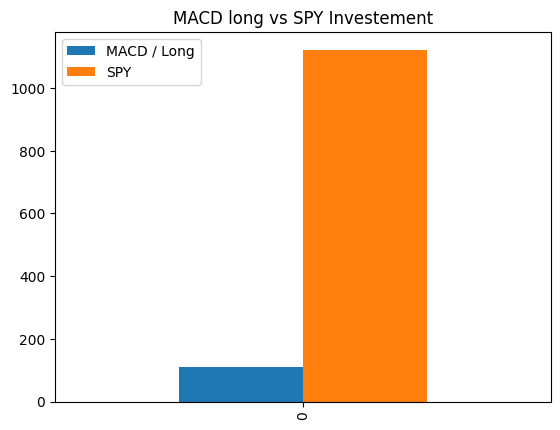

In [46]:
final_df.plot(kind ='bar', title='MACD long vs SPY Investement')

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [48]:
# Review the data types associated with the columns
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2017-01-03 05:00:00+00:00 to 2023-12-01 05:00:00+00:00
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     1741 non-null   float64
 1   high                      1741 non-null   float64
 2   low                       1741 non-null   float64
 3   trade_count               1741 non-null   int64  
 4   open                      1741 non-null   float64
 5   volume                    1741 non-null   int64  
 6   vwap                      1741 non-null   float64
 7   symbol                    1741 non-null   object 
 8   invest                    1741 non-null   float64
 9   ShortEMA                  1741 non-null   float64
 10  LongEMA                   1741 non-null   float64
 11  MACD                      1741 non-null   float64
 12  SignalLine                1741 non-null   float64
 13  histogram      

In [49]:
data_frame_neural=data_frame[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator','algo signal']]

In [50]:
data_frame_neural.head()

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,62.58,62.84,62.125,115077,62.80,23692973,62.471587,62.580000,62.580000,0.000000,...,NaN,NaN,NaN,NaN,NaN,6.461720e+06,6.461720e+06,6.461720e+06,0.000000e+00,<NA>
2017-01-04 05:00:00+00:00,62.30,62.75,62.120,112255,62.46,24383698,62.309944,62.536923,62.559259,-0.022336,...,-0.28,NaN,NaN,NaN,NaN,-3.988436e+06,1.236642e+06,4.561691e+06,-3.325050e+06,1
2017-01-05 05:00:00+00:00,62.30,62.66,62.030,117581,62.18,27927285,62.345968,62.500473,62.540055,-0.039581,...,0.00,NaN,NaN,NaN,NaN,-7.978049e+06,-3.370703e+06,2.281739e+06,-5.652442e+06,<NA>
2017-01-06 05:00:00+00:00,62.84,63.15,62.040,111899,62.35,22359924,62.787132,62.552708,62.562273,-0.009565,...,0.54,NaN,NaN,NaN,NaN,1.892549e+06,-7.390774e+05,2.210977e+06,-2.950054e+06,-1
2017-01-09 05:00:00+00:00,62.64,63.08,62.540,98825,62.67,24621963,62.726351,62.566138,62.568031,-0.001893,...,-0.20,NaN,NaN,NaN,NaN,-1.361017e+07,-7.174623e+06,-6.655951e+05,-6.509028e+06,<NA>


In [51]:
data_frame_neural.fillna(0, inplace=True)

<ipython-input-51-1e85857a162c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_neural.fillna(0, inplace=True)


In [52]:
# Review the DataFrame
data_frame_neural

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,62.58,62.84,62.125,115077,62.80,23692973,62.471587,62.580000,62.580000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,6.461720e+06,6.461720e+06,6.461720e+06,0.000000e+00,0
2017-01-04 05:00:00+00:00,62.30,62.75,62.120,112255,62.46,24383698,62.309944,62.536923,62.559259,-0.022336,...,-0.28,0.000000,0.000000,0.000000,0.000000,-3.988436e+06,1.236642e+06,4.561691e+06,-3.325050e+06,1
2017-01-05 05:00:00+00:00,62.30,62.66,62.030,117581,62.18,27927285,62.345968,62.500473,62.540055,-0.039581,...,0.00,0.000000,0.000000,0.000000,0.000000,-7.978049e+06,-3.370703e+06,2.281739e+06,-5.652442e+06,0
2017-01-06 05:00:00+00:00,62.84,63.15,62.040,111899,62.35,22359924,62.787132,62.552708,62.562273,-0.009565,...,0.54,0.000000,0.000000,0.000000,0.000000,1.892549e+06,-7.390774e+05,2.210977e+06,-2.950054e+06,-1
2017-01-09 05:00:00+00:00,62.64,63.08,62.540,98825,62.67,24621963,62.726351,62.566138,62.568031,-0.001893,...,-0.20,0.000000,0.000000,0.000000,0.000000,-1.361017e+07,-7.174623e+06,-6.655951e+05,-6.509028e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,378.61,380.64,376.200,352851,376.78,22182355,378.579232,370.977652,359.819063,11.158589,...,1.18,91.800039,100.000000,0.000000,100.000000,3.606899e+09,3.603117e+09,3.582309e+09,2.080817e+07,0
2023-11-28 05:00:00+00:00,382.70,383.00,378.160,359084,378.35,20457971,381.538263,372.781090,361.513947,11.267143,...,4.09,92.031361,100.000000,0.000000,100.000000,3.624820e+09,3.613969e+09,3.590038e+09,2.393049e+07,0
2023-11-29 05:00:00+00:00,378.85,384.30,377.440,405673,383.76,28967214,379.513925,373.714769,362.798099,10.916669,...,-3.85,90.448497,100.000000,7.142857,92.857143,3.607761e+09,3.610865e+09,3.593261e+09,1.760431e+07,0


In [53]:
X = data_frame_neural[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']].shift().dropna()
X

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-04 05:00:00+00:00,62.58,62.84,62.125,115077.0,62.80,23692973.0,62.471587,62.580000,62.580000,0.000000,...,62.53125,0.00,0.000000,0.000000,0.000000,0.000000,6.461720e+06,6.461720e+06,6.461720e+06,0.000000e+00
2017-01-05 05:00:00+00:00,62.30,62.75,62.120,112255.0,62.46,24383698.0,62.309944,62.536923,62.559259,-0.022336,...,62.36750,-0.28,0.000000,0.000000,0.000000,0.000000,-3.988436e+06,1.236642e+06,4.561691e+06,-3.325050e+06
2017-01-06 05:00:00+00:00,62.30,62.66,62.030,117581.0,62.18,27927285.0,62.345968,62.500473,62.540055,-0.039581,...,62.32250,0.00,0.000000,0.000000,0.000000,0.000000,-7.978049e+06,-3.370703e+06,2.281739e+06,-5.652442e+06
2017-01-09 05:00:00+00:00,62.84,63.15,62.040,111899.0,62.35,22359924.0,62.787132,62.552708,62.562273,-0.009565,...,62.71750,0.54,0.000000,0.000000,0.000000,0.000000,1.892549e+06,-7.390774e+05,2.210977e+06,-2.950054e+06
2017-01-10 05:00:00+00:00,62.64,63.08,62.540,98825.0,62.67,24621963.0,62.726351,62.566138,62.568031,-0.001893,...,62.72500,-0.20,0.000000,0.000000,0.000000,0.000000,-1.361017e+07,-7.174623e+06,-6.655951e+05,-6.509028e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,377.43,377.97,375.135,201905.0,377.33,10176651.0,376.814752,369.589953,358.315788,11.274164,...,376.99125,-0.42,87.454271,92.857143,0.000000,92.857143,3.605000e+09,3.599335e+09,3.576844e+09,2.249101e+07
2023-11-28 05:00:00+00:00,378.61,380.64,376.200,352851.0,376.78,22182355.0,378.579232,370.977652,359.819063,11.158589,...,378.51500,1.18,91.800039,100.000000,0.000000,100.000000,3.606899e+09,3.603117e+09,3.582309e+09,2.080817e+07
2023-11-29 05:00:00+00:00,382.70,383.00,378.160,359084.0,378.35,20457971.0,381.538263,372.781090,361.513947,11.267143,...,381.64000,4.09,92.031361,100.000000,0.000000,100.000000,3.624820e+09,3.613969e+09,3.590038e+09,2.393049e+07


In [54]:
# Create the target set selecting the Signal column and assiging it to y
y = data_frame_neural['algo signal']
y.index = pd.to_datetime(y.index, errors='coerce')
y.index = y.index.tz_convert('America/New_York')

# Review the value counts
y.value_counts()

 0    1580
 1      81
-1      80
Name: algo signal, dtype: int64

In [55]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1741 entries, 2017-01-03 00:00:00-05:00 to 2023-12-01 00:00:00-05:00
Series name: algo signal
Non-Null Count  Dtype
--------------  -----
1741 non-null   int64
dtypes: int64(1)
memory usage: 27.2 KB


In [56]:
# Display a sample of y
y[:5]

timestamp
2017-01-03 00:00:00-05:00    0
2017-01-04 00:00:00-05:00    1
2017-01-05 00:00:00-05:00    0
2017-01-06 00:00:00-05:00   -1
2017-01-09 00:00:00-05:00    0
Name: algo signal, dtype: int64

In [57]:
# Select the start of the training period
X.index = pd.to_datetime(X.index, errors='coerce')
X.index = X.index.tz_convert('America/New_York')
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-01-04 00:00:00-05:00


In [58]:
# Select the ending period for the training data with an offset of 48 months
training_end = X.index.min() + DateOffset(months=48)

# Display the training end date
print(training_end)

2021-01-04 00:00:00-05:00


In [59]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2017-01-04 00:00:00-05:00 to 2021-01-04 00:00:00-05:00
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     1007 non-null   float64
 1   high                      1007 non-null   float64
 2   low                       1007 non-null   float64
 3   trade_count               1007 non-null   float64
 4   open                      1007 non-null   float64
 5   volume                    1007 non-null   float64
 6   vwap                      1007 non-null   float64
 7   ShortEMA                  1007 non-null   float64
 8   LongEMA                   1007 non-null   float64
 9   MACD                      1007 non-null   float64
 10  SignalLine                1007 non-null   float64
 11  histogram                 1007 non-null   float64
 12  ma 50                     1007 non-null   float64
 13  ma 200         

In [60]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(days=1):]
y_test = y.loc[training_end+DateOffset(days=1):]

# Review the X_test DataFrame
X_test.head()
y_test.head()

timestamp
2021-01-05 00:00:00-05:00    0
2021-01-06 00:00:00-05:00    0
2021-01-07 00:00:00-05:00    0
2021-01-08 00:00:00-05:00    0
2021-01-11 00:00:00-05:00    0
Name: algo signal, dtype: int64

In [61]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

52

In [63]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [64]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features+1)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

26

In [65]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1+1)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

13

In [66]:
# Create the Sequential model instance
nn = Sequential()

In [67]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [68]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [69]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [70]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                1378      
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 1743 (6.81 KB)
Trainable params: 1743 (6.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_test_scaled shape: (733, 52)
y_test shape: (733,)


In [73]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7051
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9027
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9037
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9037
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9037
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.9037
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: -0.0156 - accuracy: 0.9037
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: -0.0426 - accuracy: 0.9037
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: -0.0690 - accuracy: 0.9037
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: -0.0983 - accuracy: 0.9037
Epoch

In [74]:
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_test_scaled shape: (733, 52)
y_test shape: (733,)


In [75]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - loss: -7.2613e+02 - accuracy: 0.9127 - 460ms/epoch - 20ms/step
Loss: -726.126708984375, Accuracy: 0.9126875996589661


In [76]:
# Set the model's file path
#file_path = "AlphabetSoup.h5"

# Export your model to a HDF5 file
#nn.save(file_path)

# Download your model to your computer
#files.download(file_path)

In [77]:
print(X_test_scaled)

[[ 1.97928781  2.03888948  1.97587046 ...  1.74259418  1.75518058
  -0.53223732]
 [ 1.98373624  1.94526234  1.99500678 ...  1.74926034  1.75760079
  -0.35182499]
 [ 1.86405211  1.90283546  1.91416119 ...  1.72816103  1.75069615
  -0.95496087]
 ...
 [ 5.47469996  5.38271586  5.48813862 ...  3.0817808   3.06164109
   0.86018237]
 [ 5.39314528  5.40988445  5.47265754 ...  3.07753313  3.06605104
   0.49233017]
 [ 5.39441627  5.32190002  5.43029961 ...  3.08584564  3.07345434
   0.53097293]]


In [78]:
# Create a new data frame that has the trading price in addition to the X_test_scalled and y_test:
new_df1=X_test_scaled
new_df1 = pd.DataFrame(new_df1, index=X_test.index)
new_df1['original algo signal']=data_frame['algo signal']

new_df2=y_test
new_df2 = pd.DataFrame(new_df2, index=X_test.index)

concat_df=pd.concat([new_df1, new_df2, data_frame[['trade price','close']]], axis=1)



In [79]:
new_df2

,algo signal
timestamp,
2021-01-05 00:00:00-05:00,0
2021-01-06 00:00:00-05:00,0
2021-01-07 00:00:00-05:00,0
2021-01-08 00:00:00-05:00,0
2021-01-11 00:00:00-05:00,0
...,...
2023-11-27 00:00:00-05:00,0
2023-11-28 00:00:00-05:00,0
2023-11-29 00:00:00-05:00,0


In [80]:
columns_titles_list = concat_df.columns.tolist()
print(columns_titles_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 'original algo signal', 'algo signal', 'trade price', 'close']


In [81]:
concat_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,original algo signal,algo signal,trade price,close
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-11-27 05:00:00+00:00,5.363065,5.277594,5.423097,-0.060566,5.364282,-1.438948,5.351992,5.267638,5.105766,5.558788,...,-1.039928,1.159883,3.065658,3.061755,3.043585,0.776480,<NA>,0.0,NaN,378.61
2023-11-28 05:00:00+00:00,5.388061,5.333394,5.445996,1.123869,5.352625,-0.672286,5.389378,5.297328,5.138289,5.495826,...,-1.039928,1.287186,3.068256,3.066930,3.051063,0.678627,<NA>,0.0,NaN,382.70
2023-11-29 05:00:00+00:00,5.474700,5.382716,5.488139,1.172778,5.385899,-0.782402,5.452075,5.335914,5.174957,5.554963,...,-1.039928,1.287186,3.092780,3.081781,3.061641,0.860182,<NA>,0.0,NaN,378.85
2023-11-30 05:00:00+00:00,5.393145,5.409884,5.472658,1.538350,5.500557,-0.239017,5.409183,5.355890,5.202739,5.364034,...,-0.822078,1.159883,3.069436,3.077533,3.066051,0.492330,1,1.0,378.91,378.91
2023-12-01 05:00:00+00:00,5.394416,5.321900,5.430300,1.212671,5.388866,-0.097773,5.380328,5.372991,5.228560,5.149280,...,-1.039928,1.159883,3.090307,3.085846,3.073454,0.530973,<NA>,0.0,NaN,374.51


In [82]:
# Fill NAN with 0
concat_df.fillna(0, inplace=True)

# Specify the desired start date (July 4th, 2017 in this example)
start_date = '2021-01-05 00:00:00-05:00'

# Use .loc to locate information from the specified date onwards
data_from_date_onwards = concat_df.loc[start_date:][['trade price','original algo signal','close','algo signal']]

# Actual returns
data_from_date_onwards['original balance']=data_from_date_onwards['trade price']*data_from_date_onwards['original algo signal']
original_returns= data_from_date_onwards['original balance'].sum()

# Neural returns
data_from_date_onwards['neuro balance']=data_from_date_onwards['close']*data_from_date_onwards['algo signal']
nn_strategy_returns= data_from_date_onwards['neuro balance'].sum()

# Returns DataFrame
returns_df=pd.DataFrame({"MACD / Long": [original_returns], "Neural Network":[nn_strategy_returns]})
#returns_df['original returns']=original_returns
#returns_df['neural returns']=nn_strategy_returns

# Review the DataFrame
display(data_from_date_onwards.head(50))
display(data_from_date_onwards.tail(50))
display(returns_df.head())
display(print(f"Original Returns ${original_returns}"))
display(print(f"Neural Returns ${nn_strategy_returns}"))

,trade price,original algo signal,close,algo signal,original balance,neuro balance
timestamp,,,,,,
2021-01-05 05:00:00+00:00,0.00,0,217.90,0.0,0.00,0.00
2021-01-06 05:00:00+00:00,0.00,0,212.25,0.0,0.00,0.00
2021-01-07 05:00:00+00:00,0.00,0,218.29,0.0,0.00,0.00
2021-01-08 05:00:00+00:00,0.00,0,219.62,0.0,0.00,0.00
2021-01-11 05:00:00+00:00,0.00,0,217.49,0.0,0.00,0.00
2021-01-12 05:00:00+00:00,0.00,0,214.93,0.0,0.00,0.00
2021-01-13 05:00:00+00:00,0.00,0,216.34,0.0,0.00,0.00
2021-01-14 05:00:00+00:00,0.00,0,213.02,0.0,0.00,0.00
2021-01-15 05:00:00+00:00,0.00,0,212.65,0.0,0.00,0.00


,trade price,original algo signal,close,algo signal,original balance,neuro balance
timestamp,,,,,,
2023-09-22 04:00:00+00:00,0.00,0,317.010,0.0,0.00,0.00
2023-09-25 04:00:00+00:00,0.00,0,317.540,0.0,0.00,0.00
2023-09-26 04:00:00+00:00,0.00,0,312.140,0.0,0.00,0.00
2023-09-27 04:00:00+00:00,0.00,0,312.790,0.0,0.00,0.00
2023-09-28 04:00:00+00:00,0.00,0,313.640,0.0,0.00,0.00
2023-09-29 04:00:00+00:00,0.00,0,315.750,0.0,0.00,0.00
2023-10-02 04:00:00+00:00,0.00,0,321.800,0.0,0.00,0.00
2023-10-03 04:00:00+00:00,0.00,0,313.390,0.0,0.00,0.00
2023-10-04 04:00:00+00:00,0.00,0,318.955,0.0,0.00,0.00


,MACD / Long,Neural Network
0,8.76,8.76


Original Returns $8.759999999999934


None

Neural Returns $8.759999999999934


None

<Axes: title={'center': 'MACD long vs Neural Network'}>

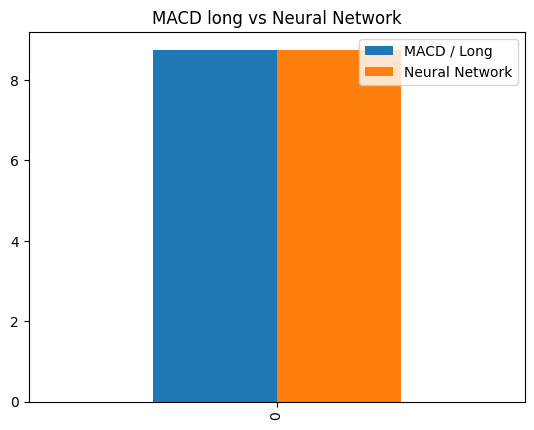

In [83]:
# Plot the actual returns versus the strategy returns
returns_df.plot(kind ='bar', title='MACD long vs Neural Network')

In [84]:
# Make second neural network with third hidden layer

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_2 =  (number_input_features+1)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_2 =  (hidden_nodes_layer1+1)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_2

# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_2 =  (hidden_nodes_layer2+1)//2

# Review the number hidden nodes in the third layer
hidden_nodes_layer3_2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2_2, activation="relu"))

# Add the third hidden layer
nn.add(Dense(units=hidden_nodes_layer3_2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 26)                1378      
                                                                 
 dense_4 (Dense)             (None, 13)                351       
                                                                 
 dense_5 (Dense)             (None, 7)                 98        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 1835 (7.17 KB)
Trainable params: 1835 (7.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
X_test_scaled shape: (733, 52)
y_test shape: (733,)
Epoch 1/100
32/32 [==============================] - 5s 4ms/step - loss: 0.5647 - accuracy: 0.7478
Epo

In [85]:
##Mkae thir neural network with two hidden layers and more neurons

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_2 =  (number_input_features+20)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_2 =  (hidden_nodes_layer1+10)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_2

# Define the number of hidden nodes for the third hidden layer
#hidden_nodes_layer3_2 =  (hidden_nodes_layer2+1)//2

# Review the number hidden nodes in the third layer
#hidden_nodes_layer3_2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2_2, activation="relu"))

# Add the third hidden layer
#nn.add(Dense(units=hidden_nodes_layer3_2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 36)                1908      
                                                                 
 dense_8 (Dense)             (None, 18)                666       
                                                                 
 dense_9 (Dense)             (None, 1)                 19        
                                                                 
Total params: 2593 (10.13 KB)
Trainable params: 2593 (10.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
X_test_scaled shape: (733, 52)
y_test shape: (733,)
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.8848
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9037
Epoch 3/100
32/32 [===============